In [ ]:
import numpy as np
import pandas as pd
# from skimage import imread
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
sys.path.append(os.path.relpath(r'C:..\src'))
import utils as ut  ### TODO: Intentar que sea relative path


## Test Kaggle (from images)

### Setup and first tests

In [16]:
### Quick reading of a mild dementia image
image = imread('../data/images/train/MildDemented/0aa95a3e-1a0d-4d38-9970-39cc4d509105.jpg')
image.shape

(190, 200, 3)

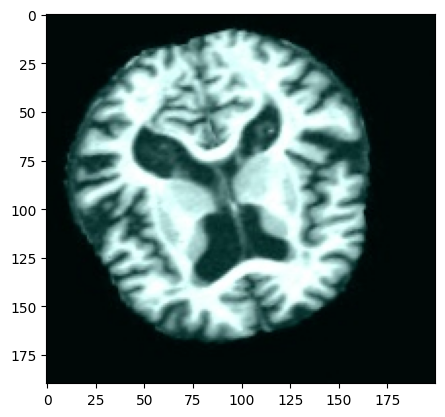

In [17]:
plt.imshow(image)

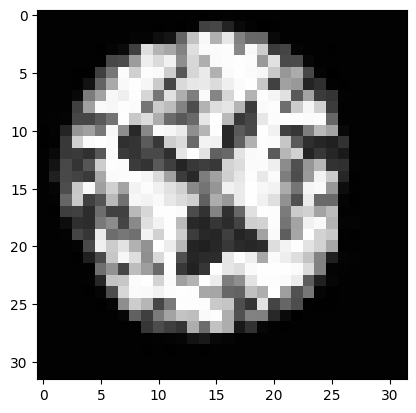

In [18]:
image = cv2.resize(image, (32, 32))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')

### Dataframe with basic info of the images

In [ ]:
### Image paths
ROOT_PATH = os.getcwd()
TRAIN_PATH = "../data/images/train/"
TEST_PATH = "../data/images/val/"
# n_0 = os.listdir(TRAIN_PATH + "MildDemented")
# n_1 = os.listdir(TRAIN_PATH + "ModerateDemented")
# n_2 = os.listdir(TRAIN_PATH + "NonDemented")
# n_3 = os.listdir(TRAIN_PATH + "VeryMildDemented")

In [19]:
### Training dataframe
main_dir = TRAIN_PATH
folders = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_dict = {'image':[],'label':[]}

for folder in folders:
    folder_path = os.path.join(main_dir,folder)
    files_folder = os.listdir(folder_path)
    for file in files_folder:
        file_name = os.path.basename(file)
        img_dict['image'].append(file_name)
        img_dict['label'].append(folder)

df_train = pd.DataFrame(img_dict)
df_train.head()

,image,label
0,00046ff7-0fae-4796-9a2b-2df47095bfe6.jpg,MildDemented
1,000cdcc4-3e54-4034-a538-203c8047b564.jpg,MildDemented
2,0013ad52-8398-4892-9fde-060eb1ae956d.jpg,MildDemented
3,0015bdfc-2059-4195-8eff-9c5cf2e2c025.jpg,MildDemented
4,001f15e8-6ad4-4e7a-bc36-b62b984dad69.jpg,MildDemented


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33984 entries, 0 to 33983
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   33984 non-null  object
 1   label   33984 non-null  object
dtypes: object(2)
memory usage: 531.1+ KB


In [21]:
df_train['label'].value_counts()

label
NonDemented         9600
MildDemented        8960
VeryMildDemented    8960
ModerateDemented    6464
Name: count, dtype: int64

Great distribution of the labels for training

### Pixels to numpy array

In [ ]:
### COMP TIME: seems like ~5 mins. I store x1,y1 later into pkls
### We set two empty lists. x1 will receive pixel info already resized and turned
### to gray scale. y1 gets the target.
x1 = []
y1 = []

for i,row in df_train.iterrows():
    count = 1
    print(f'Opening image #{count} ,{row['label']}')
    image_path = os.path.join(TRAIN_PATH, row['label'],row['image'])
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    image = cv2.resize(image, (32, 32)) ### 32x32 pixels
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Conversion to gray scale
    x1.append(image)
    y1.append(row['label'])
    count +=1

### Lists
x1 = np.array(x1)
y1 = np.array(y1)

In [78]:
y1=np.array(y1)

In [79]:
### Store x1,y1 into processed pkls
pickle.dump(x1,open('../data/images/processed_train/x1.pkl','wb'))
pickle.dump(y1,open('../data/images/processed_train/y1.pkl','wb'))

In [80]:
x1_train = pickle.load(open('../data/images/processed_train/x1.pkl','rb'))
y1_train = pickle.load(open('../data/images/processed_train/y1.pkl','rb'))

In [ ]:
y1_train.shape

(33984,)

### Same to x_test

In [ ]:
### Val dataframe
main_dir = TEST_PATH
folders = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_dict = {'image':[],'label':[]}

for folder in folders:
    folder_path = os.path.join(main_dir,folder)
    files_folder = os.listdir(folder_path)
    for file in files_folder:
        file_name = os.path.basename(file)
        img_dict['image'].append(file_name)
        img_dict['label'].append(folder)

df_test = pd.DataFrame(img_dict)
df_test.head()

,image,label
0,26 (19).jpg,MildDemented
1,26 (20).jpg,MildDemented
2,26 (21).jpg,MildDemented
3,26 (22).jpg,MildDemented
4,26 (23).jpg,MildDemented


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   6400 non-null   object
 1   label   6400 non-null   object
dtypes: object(2)
memory usage: 100.1+ KB


In [84]:
x2 = []
y2 = []

for i,row in df_test.iterrows():
    count = 1
    print(f'Opening image #{count} ,{row['label']}')
    image_path = os.path.join(TEST_PATH, row['label'],row['image'])
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    image = cv2.resize(image, (32, 32)) ### 32x32 pixels
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Conversion to gray scale
    x2.append(image)
    y2.append(row['label'])
    count +=1

### Lists
x2 = np.array(x2)
y2 = np.array(y2)

Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening 

In [85]:
pickle.dump(x2,open('../data/images/processed_val/x2.pkl','wb'))
pickle.dump(y2,open('../data/images/processed_val/y2.pkl','wb'))

## Fit de modelos con datasets desde pickle

In [20]:
x1_train = x1_train.reshape(-1, 1)
x1_train.shape

(34799616, 1)

In [28]:
x1_train = pickle.load(open('../data/images/processed_train/x1.pkl','rb'))
y1_train = pickle.load(open('../data/images/processed_train/y1.pkl','rb'))
x1_test = pickle.load(open('../data/images/processed_val/x2.pkl','rb'))
y1_test = pickle.load(open('../data/images/processed_val/y2.pkl','rb'))
mapping = {
    'NonDemented': 0,
    'VeryMildDemented': 1,
    'MildDemented': 2,
    'ModerateDemented': 3
}
y1_train = np.vectorize(mapping.get)(y1_train)
y1_test = np.vectorize(mapping.get)(y1_test)
x1_train = x1_train.reshape(-1, 1)
x1_test = x1_test.reshape(-1, 1)
### Reshape needed for scalling
scal = StandardScaler()
x1_train = scal.fit_transform(x1_train)
x1_test = scal.transform(x1_test)
### And we reshape to the final shape needed for the model
x1_train = x1_train.reshape(-1, 32, 32, 1)
x1_test = x1_test.reshape(-1, 32, 32, 1)


In [23]:
x1_train.shape

(33984, 32, 32, 1)

### Baseline image model

In [ ]:
### COMP TIME: around 2 mins, 30 epochs - 5 min, 70 epochs
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# Capa densa con Dropout
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout para reducir overfitting

model.add(layers.Dense(4, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# label_encoder = LabelEncoder()
# y1_train_encoded = label_encoder.fit_transform(y1_train)
# y2_test_encoded = label_encoder.transform(y1_test)
model.fit(x1_train,y1_train,epochs=70,batch_size = 128,validation_split = 0.2
          )


Epoch 1/70


c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4693 - loss: 1.1984 - val_accuracy: 0.0000e+00 - val_loss: 2.1730
Epoch 2/70
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6574 - loss: 0.8680 - val_accuracy: 0.0000e+00 - val_loss: 2.2074
Epoch 3/70
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6840 - loss: 0.7465 - val_accuracy: 0.0000e+00 - val_loss: 2.0638
Epoch 4/70
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7044 - loss: 0.6973 - val_accuracy: 0.0000e+00 - val_loss: 2.1554
Epoch 5/70
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7211 - loss: 0.6482 - val_accuracy: 0.0000e+00 - val_loss: 2.0159
Epoch 6/70
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7347 - loss: 0.6185 - val_accuracy: 0.0000e+00 - val_loss: 2.1230
Epoch 7/70
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7440 - loss: 0.5945 - val_accuracy: 0.0000e+00 - val_loss: 2.0439
Epoch 8/70
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7567 - loss: 

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,423 (1.06 MB)

 Trainable params: 92,807 (362.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 185,616 (725.07 KB)

In [38]:
model.save("../models/image/baseline_model.keras")
model3 = models.load_model("../models/image/baseline_model.keras")

In [31]:
model3.evaluate(x1_test, y1_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1155


[0.37677183747291565, 0.8621875047683716]

In [42]:
confusion_matrix(y1_test, model3.predict(x1_test).argmax(axis=1),normalize='pred')

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.82209544, 0.02115656, 0.        , 0.        ],
       [0.17790456, 0.97884344, 0.15311909, 0.05882353],
       [0.        , 0.        , 0.84688091, 0.        ],
       [0.        , 0.        , 0.        , 0.94117647]])

### Prediction of one image

In [34]:
test_image = test_image.reshape(-1, 32, 32, 1)
test_image.shape

(1, 32, 32, 1)

In [ ]:
test_image = cv2.imread('../data/images/val/MildDemented/30.jpg')
# test_image = cv2.imread('../data/images/val/NonDemented/26 (70).jpg')
test_image = cv2.resize(test_image, (32, 32)) ### 32x32 pixels
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY) ### Conversion to gray scale
test_image = test_image.reshape(-1, 32, 32, 1)
pred = model3.predict(test_image)
pred.shape
pred.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


np.int64(0)

In [34]:
test_def = ut.img_model_prediction('../data/images/val/NonDemented/26 (88).jpg')
test_def

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


np.int64(0)